# Time Series Analysis

In [165]:
from __future__ import print_function
import pandas as pd
import statsmodels.tsa.stattools as ts
from datetime import datetime

In [166]:
ada = pd.read_csv('/home/aj/Downloads/DB Test/OHLCV_Cyrpto_csv/Binance_ADAUSDT_1d_data.csv')
ada = pd.DataFrame(ada)
ada.index = ada['timestamp']
ada.drop('timestamp', axis=1)
eos = pd.read_csv('/home/aj/Downloads/DB Test/OHLCV_Cyrpto_csv/Binance_EOSUSDT_1d_data.csv')
eos = pd.DataFrame(eos)
eos.index = eos['timestamp']
eos.drop('timestamp', axis=1)
eos.head()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av
timestamp,,,,,,,,,,,
2018-11-30,2018-11-30,3.0243,3.0708,2.7988,2.8921,6395295.43,1543622399999,1.863571e+07,40627,3313535.52,9.664026e+06
2018-12-01,2018-12-01,2.8904,3.0244,2.8240,2.9404,3522585.91,1543708799999,1.032837e+07,26853,1891109.11,5.547724e+06
2018-12-02,2018-12-02,2.9379,3.0150,2.8051,2.8605,2898250.12,1543795199999,8.499239e+06,22441,1525622.54,4.476964e+06
2018-12-03,2018-12-03,2.8628,2.8900,2.5252,2.5891,4760372.19,1543881599999,1.289987e+07,33426,2341025.85,6.352291e+06
2018-12-04,2018-12-04,2.5912,2.6279,2.3046,2.4503,8192843.31,1543967999999,2.047051e+07,52705,4086472.40,1.021021e+07


In [167]:
ada.head()

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av
timestamp,,,,,,,,,,,
2018-11-30,2018-11-30,0.04198,0.04250,0.03765,0.03907,186391587.5,1543622399999,7.386293e+06,28494,88895740.0,3.522477e+06
2018-12-01,2018-12-01,0.03907,0.04240,0.03804,0.04138,125557616.1,1543708799999,5.104465e+06,20785,65220243.4,2.650766e+06
2018-12-02,2018-12-02,0.04133,0.04340,0.04057,0.04187,143922734.4,1543795199999,6.014694e+06,22226,70092220.3,2.931435e+06
2018-12-03,2018-12-03,0.04184,0.04214,0.03785,0.03848,145293533.5,1543881599999,5.762926e+06,23224,69778723.4,2.771550e+06
2018-12-04,2018-12-04,0.03849,0.04019,0.03700,0.03752,162431792.0,1543967999999,6.244945e+06,24786,80689281.2,3.105901e+06


In [168]:
ada_ADF = ts.adfuller(ada['close'], 1)

The first value is the calculated test-statistic, while the second value is the p-value. The fourth is the
number of data points in the sample. The fifth value, the dictionary, contains the critical values
of the test-statistic at the 1, 5 and 10 percent values respectively.

In [169]:
ada_ADF

(-1.4348144971628194,
 0.5654765517836365,
 0,
 228,
 {'1%': -3.4593607492757554,
  '5%': -2.8743015807562924,
  '10%': -2.5735714042782396},
 -1928.2040759738252)

In [170]:
eos_ADF = ts.adfuller(eos['close'], 1)

In [171]:
eos_ADF

(-1.2041248884438438,
 0.671818776685937,
 1,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 56.73880625867946)

Since the calculated value of the test statistic is larger than any of the critical values at the 1,
5 or 10 percent levels, we cannot reject the null hypothesis of γ = 0 and thus we are unlikely to
have found a mean reverting time series.

In [172]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn

In [173]:
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)
    
    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
gbm = log(cumsum(randn(100000))+1000)
mr = log(randn(100000)+1000)
tr = log(cumsum(randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Amazon (the Adjusted Close price) for
# the ADF test given above in the article
print("Hurst(GBM):    %s" % hurst(gbm))
print("Hurst(MR):     %s" % hurst(mr))
print("Hurst(TR):     %s" % hurst(tr))

# Assuming you have run the above code to obtain ’amzn’!
print("Hurst(ADA): %s" % hurst(ada['close']))
print("Hurst(EOS): %s" % hurst(eos['close']))

Hurst(GBM):    0.4942006765317942
Hurst(MR):     0.0003387880558998913
Hurst(TR):     0.956049508615092
Hurst(ADA): 0.2665660690145736
Hurst(EOS): 0.19822048799458936


From this output we can see that the GBM possesses a Hurst Exponent, H, that is almost
exactly 0.5. The mean reverting series has H almost equal to zero, while the trending series has
H close to 1.
Interestingly, ADA and EOS has H also closer to 0 indicating that it could be similar to a mean reverting series, at least
for the sample period we’re making use of!

In [174]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pprint

In [175]:
def plot_price_series(df, ts1, ts2):
    pair = df[["ADA", "EOS"]]
    pair.div(pair.iloc[0,:]).plot(figsize=(12, 7))
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1, ts2))
    plt.show();

In [214]:
def plot_scatter_series():

    x = sm.add_constant(ada['close'], prepend=False)
    ols = sm.OLS(eos['close'], x).fit()
    beta = ols.params
    y_fit = [x.min().dot(beta), x.max().dot(beta)]
    
    df = ada
    cm = plt.get_cmap('jet')
    colors = np.linspace(0.1, 1, len(df))
    plt.figure(figsize=(12, 7))
    sc = plt.scatter(ada['close'], eos['close'], s=50, c=colors, cmap=cm, 
                 edgecolor='k', alpha=0.7, label='Price Data')
    plt.plot([x.min()[0], x.max()[0]], y_fit, 'black', linestyle='--', linewidth=1, label='OLS Fit')
    plt.legend()
    cb = plt.colorbar(sc)
    cb.ax.set_yticklabels([str(p) for p in ada.index])
    plt.xlabel('ADA Price($)')
    plt.ylabel('EOS Price($)')
    plt.title('ADA and EOS Price Scatterplot')
    plt.show();
    print(ols.summary2())
    
    '''
    plt.figure(figsize=(12, 7))
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.show();
    '''

In [245]:
def plot_residuals(df):
    corr_mean = df["res"].mean()
    corr_std = df["res"].std()
    
    fig, ax = plt.subplots()
    df["res"].plot(figsize=(12, 7), color='black')
    plt.axhline( df["res"].mean(), color='blue', linestyle='--')
    plt.axhline(corr_mean + corr_std, linestyle=':', color='red')
    plt.axhline(corr_mean - corr_std, linestyle=':', color='green')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()
    plt.show();

In [246]:
from statsmodels import regression, stats
import statsmodels.api as sm

In [247]:
def hedge_ratio(Y, X):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    return model.params[1]

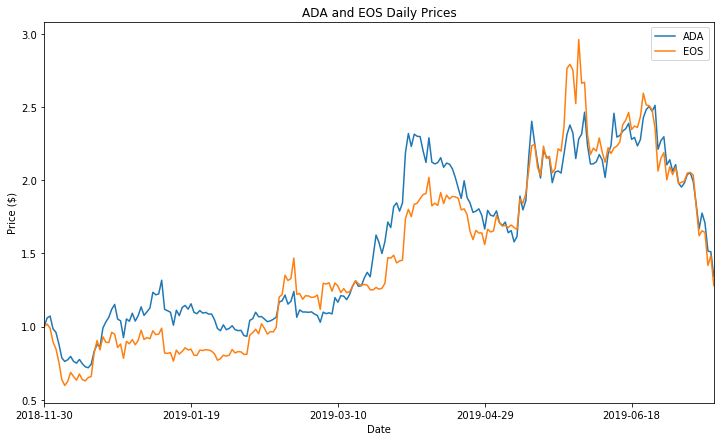

/home/aj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


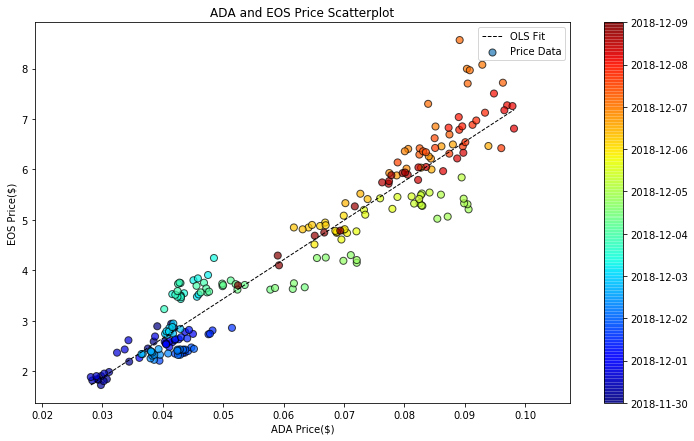

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.913    
Dependent Variable: close            AIC:                334.3295 
Date:               2019-07-18 16:59 BIC:                341.1970 
No. Observations:   229              Log-Likelihood:     -165.16  
Df Model:           1                F-statistic:        2397.    
Df Residuals:       227              Prob (F-statistic): 1.23e-122
R-squared:          0.914            Scale:              0.24992  
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
close      77.8305     1.5895   48.9641   0.0000   74.6984   80.9627
const      -0.4566     0.1021   -4.4704   0.0000   -0.6579   -0.2554
------------------------------------------------------------------
Omnibus:               12.115       Durbin-Watson:          0.135 
Pro

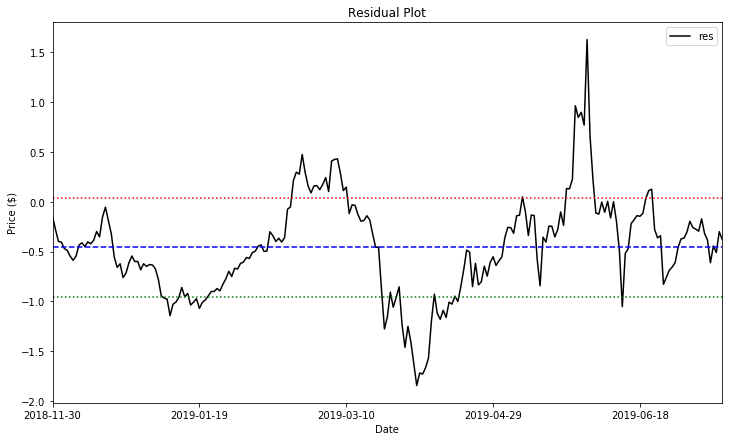

(-2.8480120539279055, 0.051736101727479784, 0, 228, {'1%': -3.4593607492757554, '5%': -2.8743015807562924, '10%': -2.5735714042782396}, -108.41724420695277)


In [248]:
if __name__ == "__main__":
        
    df = eos
    #df.index = eos.index
    df["ADA"] = ada['close']
    df["EOS"] = eos['close']
        
    # Plot the two time series
    pair = df[["ADA", "EOS"]]
    #pair.div(pair.iloc[0,:]).plot()
    plot_price_series(df,"ADA","EOS")
    #plot_price_series(df, "ADA", "EOS")
    
    # Display a scatter plot of the two time series
    #plot_scatter_series(df, "ADA", "EOS")
    plot_scatter_series()
    
    # Calculate optimal hedge ratio "beta"
    x = sm.add_constant(ada['close'], prepend=False)
    res = sm.OLS(eos['close'], x).fit()
    beta_hr = hedge_ratio(eos['close'], ada['close'])
    
    # Calculate the residuals of the linear combination
    df["res"] = df["EOS"] - beta_hr*df["ADA"]
    
    # Plot the residuals
    plot_residuals(df)
    
    # Calculate and output the CADF test on the residuals
    cadf = ts.adfuller(df["res"])
    print(cadf)
    #pprint.pprint(cadf)